
# Statistics Advanced - 2 | Assignment

# Theory Questions


### Question 1: What is hypothesis testing in statistics?

**Answer:**  
Hypothesis testing is a formal, probabilistic procedure to evaluate claims about a population parameter using sample data. We specify a **null hypothesis (H0)** representing the status quo and an **alternative hypothesis (H1)** representing a competing claim, choose a significance level (alpha), compute a test statistic from the data, and decide to **reject** or **fail to reject** H0 based on the p-value or a critical region.



### Question 2: What is the null hypothesis, and how does it differ from the alternative hypothesis?

**Answer:**  
The **null hypothesis (H0)** is the default claim about a population parameter (e.g., mu = mu0) assumed true unless evidence suggests otherwise. The **alternative hypothesis (H1)** states what we seek evidence for (e.g., mu != mu0, mu > mu0, or mu < mu0). Decisions are framed to control false rejections of H0 at a chosen significance level.



### Question 3: Explain the significance level in hypothesis testing and its role in deciding the outcome of a test.

**Answer:**  
The **significance level (alpha)** is the long-run probability of incorrectly rejecting a true null hypothesis (Type I error). Typical choices are 0.05 or 0.01. We reject H0 if the p-value <= alpha (or equivalently, if the test statistic falls in the critical region defined by alpha); otherwise, we fail to reject H0.



### Question 4: What are Type I and Type II errors? Give examples of each.

**Answer:**  
- **Type I error (False Positive):** Rejecting H0 when H0 is true.  
  Example: Concluding a new drug works when it actually does not.
- **Type II error (False Negative):** Failing to reject H0 when H1 is true.  
  Example: Concluding a new drug does not work when it actually does.
The probabilities of these errors are alpha (Type I) and beta (Type II), with **power = 1 - beta**.



### Question 5: What is the difference between a Z-test and a T-test? Explain when to use each.

**Answer:**  
- **Z-test:** Used when the population standard deviation (sigma) is known or the sample is large and sigma is well-estimated; the test statistic follows the standard normal distribution.  
- **t-test:** Used when sigma is unknown and must be estimated from the sample; the test statistic follows a t distribution with appropriate degrees of freedom.  
In practice, for small samples with unknown sigma, use a t-test; for large samples or known sigma, a Z-test is appropriate.


# Practical Questions


### Q6: Write a Python program to generate a binomial distribution with n=10 and p=0.5, then plot its histogram.  

Sample mean (should be close to n*p): 4.982
Sample variance (should be close to n*p*(1-p)): 2.5064759999999997


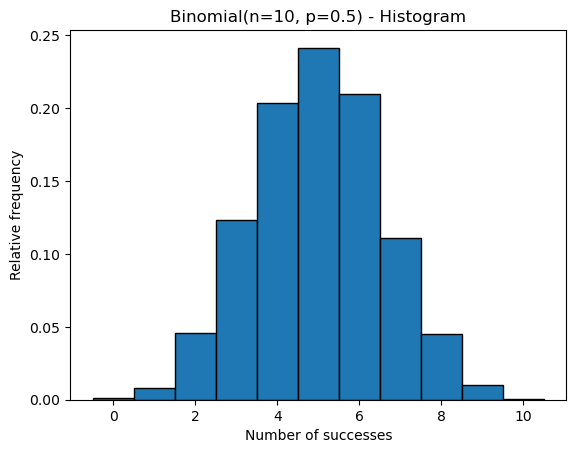

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

n = 10
p = 0.5
size = 5000

samples = np.random.binomial(n=n, p=p, size=size)

# Basic descriptive stats
print("Sample mean (should be close to n*p):", samples.mean())
print("Sample variance (should be close to n*p*(1-p)):", samples.var())

# Plot histogram
plt.figure()
plt.hist(samples, bins=np.arange(-0.5, n+1.5, 1), edgecolor='black', density=True)
plt.title('Binomial(n=10, p=0.5) - Histogram')
plt.xlabel('Number of successes')
plt.ylabel('Relative frequency')
plt.show()



### Q7: Implement hypothesis testing using Z-statistics for a sample dataset in Python. Show the Python code and interpret the results.

Sample data:  
```
[49.1, 50.2, 51.0, 48.7, 50.5, 49.8, 50.3, 50.7, 50.2, 49.6, 
 50.1, 49.9, 50.8, 50.4, 48.9, 50.6, 50.0, 49.7, 50.2, 49.5, 
 50.1, 50.3, 50.4, 50.5, 50.0, 50.7, 49.3, 49.8, 50.2, 50.9, 
 50.3, 50.4, 50.0, 49.7, 50.5, 49.9]
```

Assume we are testing: H0: mu = 50  vs.  H1: mu != 50 (two-sided), at alpha = 0.05.


In [2]:
import numpy as np
from math import sqrt, erf

sample_data = np.array([49.1, 50.2, 51.0, 48.7, 50.5, 49.8, 50.3, 50.7, 50.2, 49.6, 
                        50.1, 49.9, 50.8, 50.4, 48.9, 50.6, 50.0, 49.7, 50.2, 49.5, 
                        50.1, 50.3, 50.4, 50.5, 50.0, 50.7, 49.3, 49.8, 50.2, 50.9, 
                        50.3, 50.4, 50.0, 49.7, 50.5, 49.9])

mu0 = 50.0
alpha = 0.05
n = len(sample_data)
xbar = sample_data.mean()
s = sample_data.std(ddof=1)

Z = (xbar - mu0) / (s / sqrt(n))

def norm_cdf(z):
    return 0.5 * (1.0 + erf(z / sqrt(2.0)))

p_value = 2.0 * (1.0 - norm_cdf(abs(Z)))

print(f"n = {n}, mean = {xbar:.4f}, s = {s:.4f}")
print(f"Z statistic = {Z:.4f}")
print(f"Two-sided p-value = {p_value:.6f}")

if p_value <= alpha:
    print("Decision: Reject H0 at alpha = 0.05.")
else:
    print("Decision: Fail to reject H0 at alpha = 0.05.")


n = 36, mean = 50.0889, s = 0.5365
Z statistic = 0.9940
Two-sided p-value = 0.320210
Decision: Fail to reject H0 at alpha = 0.05.



Interpretation:  
We compute a Z statistic using the sample mean and sample standard deviation (large-sample normal approximation). If the p-value <= 0.05, there is sufficient evidence that the true mean differs from 50; otherwise, we do not have enough evidence to claim a difference.



### Q8: Write a Python script to simulate data from a normal distribution and calculate the 95% confidence interval for its mean. Plot the data using Matplotlib.


Sample mean = 10.0114
95% CI for mean = [9.5727, 10.4500]


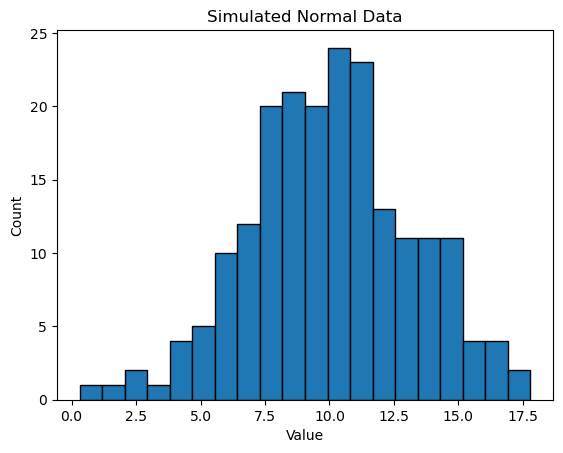

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

np.random.seed(123)

# Simulate normal data
n = 200
true_mu = 10.0
true_sigma = 3.0
data = np.random.normal(loc=true_mu, scale=true_sigma, size=n)

# 95% CI using normal approximation
xbar = data.mean()
s = data.std(ddof=1)
se = s / sqrt(n)
z_crit = 1.96  
ci_lower = xbar - z_crit * se
ci_upper = xbar + z_crit * se

print(f"Sample mean = {xbar:.4f}")
print(f"95% CI for mean = [{ci_lower:.4f}, {ci_upper:.4f}]")

# Plot histogram of the simulated data
plt.figure()
plt.hist(data, bins=20, edgecolor='black', density=False)
plt.title('Simulated Normal Data')
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()



### Q9: Write a Python function to calculate the Z-scores from a dataset and visualize the standardized data using a histogram. Explain what the Z-scores represent in terms of standard deviations from the mean.


First five Z-scores: [-1.86923647  0.21002657  1.72221787 -2.62533213  0.77709831]


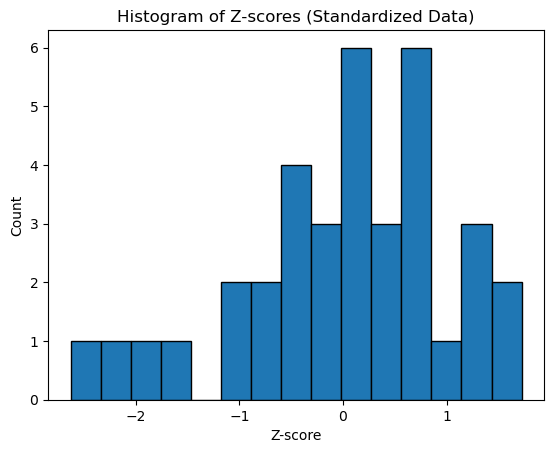

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def z_scores(x):
    x = np.asarray(x, dtype=float)
    mu = x.mean()
    sigma = x.std(ddof=0) 
    if sigma == 0:
        raise ValueError("Standard deviation is zero; Z-scores undefined.")
    return (x - mu) / sigma

zs = z_scores([49.1, 50.2, 51.0, 48.7, 50.5, 49.8, 50.3, 50.7, 50.2, 49.6, 
               50.1, 49.9, 50.8, 50.4, 48.9, 50.6, 50.0, 49.7, 50.2, 49.5, 
               50.1, 50.3, 50.4, 50.5, 50.0, 50.7, 49.3, 49.8, 50.2, 50.9, 
               50.3, 50.4, 50.0, 49.7, 50.5, 49.9])

print("First five Z-scores:", zs[:5])

plt.figure()
plt.hist(zs, bins=15, edgecolor='black')
plt.title('Histogram of Z-scores (Standardized Data)')
plt.xlabel('Z-score')
plt.ylabel('Count')
plt.show()



Explanation:  
A Z-score tells how many standard deviations an observation lies from the mean:  
z_i = (x_i - x_bar) / s  (or using population standard deviation if known).  
Values near 0 are close to the mean; about +-1 are roughly one standard deviation away; larger magnitudes indicate more extreme observations.


# ------------------------------- Thank You ----------------------------